# Lead Scoring : Logistic Regression Case Study
#### Steps :
- 1.Introduction
- 2.Python Libraries
- 3.Reading and Understanding the data
- 4.Data Cleaning
- 5.Exploratory Data Analysis
- 6.Data Preparation
- 7.Model Building
- 8.Model Evaluation : Train dataset
- 9.Making Predictions on test data set

# <font color= navy>1.Introduction</font>
## <font color= purple>Problem Statement</font>
- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
 
- The company markets its courses on several websites, search engines, and even social media sometimes. Once these people land on the website, they might browse the courses, fill out a form for the course, or watch some videos. When these people fill out a form with their email address or phone number, they are classified as leads. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted into successful sales, while most of the leads do not. The typical lead to successful sale conversion rate at X education is around 30%.
 
- Now, although X Education gets a lot of leads, its lead-to-sale conversion rate is very poor. For example, if they acquire 100 leads in a day, only about 30 of them are converted into successful sales. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate would go up as the sales team would now be focusing more on communicating with the potential leads rather than making calls to everyone.The CEO, in particular, has given a ballpark estimate of the target lead conversion rate as being around 80%.
## <font color= purple>Data</font>
- You were given a leads dataset from the past that contained approximately 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on the Website, Total Visits, Last Activity, etc., which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’, which tells whether a past lead was converted or not, where 1 means it was converted and 0 means it wasn’t converted.

- Another thing that you also need to check out is the levels present in the categorical variables. Many of the categorical variables have a level called ‘Select’ which needs to be handled because it is as good as a null value.

## <font color= purple>Business Goal</font>
- 1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads, which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e., most likely to convert, whereas a lower score would mean that the lead is cold and will mostly not get converted.

- 2.There are some more problems presented by the company that your model should be able to adjust to if the company’s requirements change in the future, so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it out based on the logistic regression model you got in the first step. Also, make sure you include this in your final PowerPoint presentation, where you’ll make recommendations.
 

## <font color= navy>2. Python libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

## <font color= navy>3.Reading & Understanding the data</font>

In [3]:
pd.set_option("display.max_columns",None)
lead = pd.read_csv('/Users/sakshimunde/Downloads/Lead Scoring Assignment/Leads.csv')

In [4]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# let's see dimension
lead.shape

(9240, 37)

In [6]:
# checking numerical columns statistically
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- There are null values in the dataset.Let's inspect the null values first.
## <font color= navy>4.Data Cleaning</font>

In [8]:
# There are few columns which has 'select' has one of the category.
# This is bcz the person has not filled that field.So we will replace it by nan

lead = lead.replace('Select',np.nan)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# column wise null values
round(lead.isnull().sum()/len(lead.index),3)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [10]:
# Row wise null values
round(lead.isnull().sum(axis=1)/lead.shape[1],2)*100

0       14.0
1       14.0
2        3.0
3        3.0
4        5.0
        ... 
9235     3.0
9236     3.0
9237     3.0
9238    14.0
9239     3.0
Length: 9240, dtype: float64

In [11]:
# let's see rows with more than 50% of null values

len(lead[lead.isnull().sum(axis=1)/lead.shape[1]>0.5])

0

- There is no row that has null values greater than 50%
- There are 17 columns that has null values.7 columns are having null values more than 45%.

In [12]:
# Checking duplicates

lead.duplicated(subset ='Prospect ID').sum()

0

- "Prospect ID" and "lead number" are variables that are just indicative of id number of the contacted people and can be dropped.We will also drop columns that have null values more than 45%. Thus there are other variables that are not useful for further analysis, we will drop those as well.

In [13]:
# dropping unnecessary columns
lead.drop(["Prospect ID","Lead Number","How did you hear about X Education",'Tags','Lead Profile','Lead Quality',
           
          'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 
           
          'Asymmetrique Profile Score','Last Notable Activity'],axis=1,inplace=True)



In [14]:
# let's see number of columns in our dataset after dropping unnecessary vars
len(lead.columns)

26

#### <font color= purple>Segregating Numerical and Categorical values</font>

In [15]:
# categorical vars
cat_col = lead.select_dtypes(exclude = ['number']).columns.values
cat_col

array(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'], dtype=object)

In [16]:
# numerical columns
numeric_col = lead.select_dtypes(include = ['number']).columns.values
numeric_col

array(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

#### <font color= purple>Categorical columns null values treatment</font>

In [17]:
# Checking unique value of categorical columns
for value in cat_col:
    df = lead[value].nunique()
    print(value)
    print(df)

Lead Origin
5
Lead Source
21
Do Not Email
2
Do Not Call
2
Last Activity
17
Country
38
Specialization
18
What is your current occupation
6
What matters most to you in choosing a course
3
Search
2
Magazine
1
Newspaper Article
2
X Education Forums
2
Newspaper
2
Digital Advertisement
2
Through Recommendations
2
Receive More Updates About Our Courses
1
Update me on Supply Chain Content
1
Get updates on DM Content
1
City
6
I agree to pay the amount through cheque
1
A free copy of Mastering The Interview
2


- There are some columns that has only one category like 'magazine','receive more updates about our courses' etc.This columns don't add any value to the model so we will deop them.

In [18]:
# dropping colums that has only one category value
lead.drop(['Magazine','Receive More Updates About Our Courses',
           'Update me on Supply Chain Content',
           'Get updates on DM Content',
           'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [19]:
len(lead.columns)

21

In [20]:
# now checking null values 
round(lead.isnull().sum()/len(lead.index),3)*100

Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement                             0.0
Through Recommendations     

###### <font color= purple>Country</font>

In [21]:
# country 
lead.Country.value_counts(normalize = True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

- 96% of the data is mapped as india.Country data is heavily skewed.Thus country data is not required for the modelling purpose thus we will drop it.

In [22]:
# dropping country column
lead.drop('Country',axis=1,inplace =True)

###### <font color= purple>Specialization</font>

In [23]:
# Specialization          
lead.Specialization.value_counts()


Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

- It may posiible that the lead don't have any specialization or may be a student and has no wrok experience.So we will create a new category 'Others' to replace the null values.

In [24]:
# we will impute nan values with 'others'
lead['Specialization'] = lead.Specialization.replace(np.nan ,'Others')


######  <font color= purple>What is your current occupation</font>

In [25]:

lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

- 85% of values are unemployed. If we impute null values with unemployed then the data will become more skewed. Thus we will impute null values with Unknown

In [26]:
# impute null values with 'unknown' in 'what is your current occupation'
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan ,'Unknown')
lead['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

###### <font color= purple>What matters most to you in choosing a course</font>

In [27]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- As the data is skewed ,we will delete the column

In [28]:
# drop 'what matters most to you in choosing a course' variable
lead.drop('What matters most to you in choosing a course',axis=1,inplace=True)

##### <font color= purple>City</font>

In [29]:
lead.City.value_counts(normalize =True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

- There are 40% of null values in the city column.We can impute nan with mode but this will make whole data skewed.Thus X Education is an online teaching platform, city column is not much useful. We will drop city column.

In [30]:
# drop city column
lead.drop('City',axis=1,inplace=True)

###### <font color= purple>Lead Source</font> 

In [31]:
lead['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [32]:
# we will impute nan values by 'google'
lead['Lead Source'] = lead['Lead Source'].replace(np.nan ,'Google')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'].value_counts(normalize=True)*100

Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

###### <font color= purple>Last Activity</font> 

In [33]:
lead['Last Activity'].value_counts(normalize =True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [34]:
# Impute nan values with email opened  
lead['Last Activity'] = lead['Last Activity'].replace(np.nan ,'Email Opened')
lead['Last Activity'].value_counts(normalize=True)*100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

### <font color= purple>Numerical columns null value treatment</font>
##### <font color= darkgreen>Total Visits</font>

<AxesSubplot:xlabel='TotalVisits'>

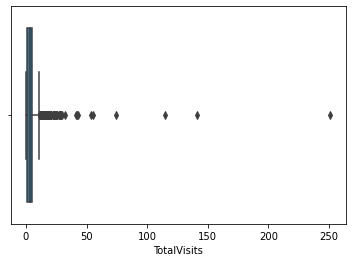

In [35]:
sns.boxplot(lead['TotalVisits'])

In [36]:
lead['TotalVisits'].median()

3.0

In [37]:
# there are so many outliers thus we will impute null values with median ,not with mean
lead['TotalVisits'].fillna(lead['TotalVisits'].median() ,inplace=True)
lead['TotalVisits'].isnull().sum()

0

##### <font color= purple>Page Views Per Visit</font>

<AxesSubplot:xlabel='Page Views Per Visit'>

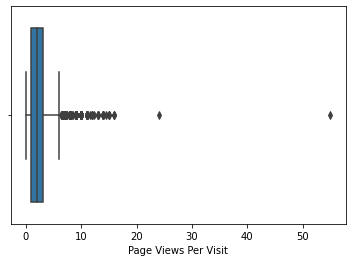

In [38]:
sns.boxplot(lead['Page Views Per Visit'])

In [39]:
# we will impute with mdeian not with as there are many outliers
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median() ,inplace =True)
lead['Page Views Per Visit'].isnull().sum()

0

In [40]:
# Checking null values
lead.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
dtype: int64

# <font color= navy>5.Exploratory Data Analysis</font>

In [41]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,No,No,No,No,No,No


In [42]:
# let's see converted lead 
(lead.Converted.sum()/len(lead.Converted))*100

38.53896103896104

- Converted is target variable, indiactes whether a lead has converted or not.
- 38.5% of lead converted.

In [43]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [44]:
# Renaming column headers that has longer headers
lead.rename(columns={'What is your current occupation' : 'Occupation',
                    'Through Recommendations' : 'Recommendation',
                    'A free copy of Mastering The Interview' : 'Free Copy'},inplace = True)
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Copy'],
      dtype='object')

### <font color= purple>Univariate Analysis - categorical</font>
### <font color=darkgreen> Lead Origin </font>

In [45]:
# categorical columns
cat_col = lead.select_dtypes(exclude ='number').columns.values
cat_col

array(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'Occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Copy'],
      dtype=object)

In [46]:
# Lead origin : actual lead and converted lead to customers
lead_origin_count = lead['Lead Origin'].value_counts()
lead_origin_percentage = lead["Lead Origin"].value_counts(normalize=True)*100
lead_conversion_rate = lead.groupby('Lead Origin')['Converted'].mean()*100

result = pd.concat([lead_origin_count,lead_origin_percentage,lead_conversion_rate],axis=1)
result.columns = ['lead_origin_count','lead_origin_percentage','lead_conversion_rate']
result

,lead_origin_count,lead_origin_percentage,lead_conversion_rate
Landing Page Submission,4886,52.878788,36.185018
API,3580,38.744589,31.145251
Lead Add Form,718,7.770563,92.479109
Lead Import,55,0.595238,23.636364
Quick Add Form,1,0.010823,100.000000


In [47]:
lead_conversion_rate= lead_conversion_rate.reset_index()


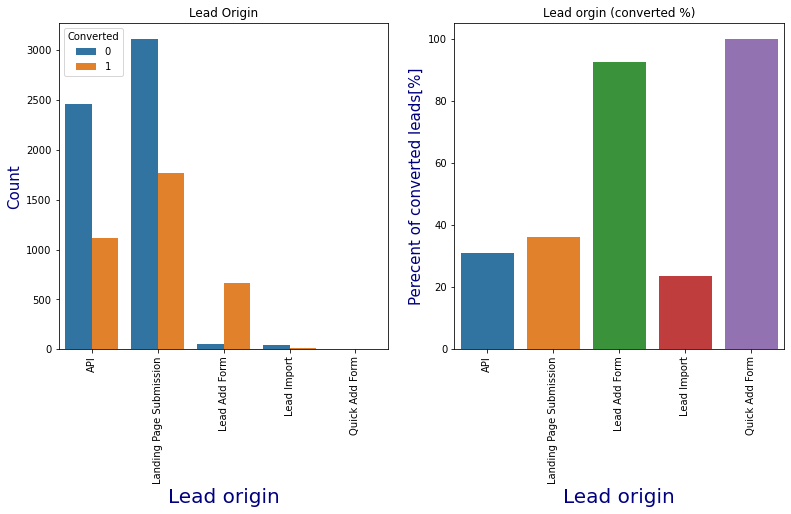

In [48]:
# Plotting to see the distribution of conversion

plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
sns.countplot(x='Lead Origin' , hue ='Converted' , data=lead)
plt.title("Lead Origin")
plt.xlabel('Lead origin', fontdict={'color': 'navy' , 'size':20})
plt.ylabel('Count',fontdict={'color': 'navy' , 'size':15})
plt.xticks(rotation=90)

# percentage of converted leads 

plt.subplot(1,2,2)
sns.barplot(x= 'Lead Origin' ,y='Converted',data = lead_conversion_rate)
plt.title("Lead orgin (converted %)")
plt.xlabel('Lead origin', fontdict={'color': 'navy' , 'size':20})
plt.ylabel('Perecent of converted leads[%]',fontdict={'color': 'navy' , 'size':15})
plt.xticks(rotation = 90)

plt.show()

- Lead origin referes to the source or channel through which lead was generated.For example, a lead may have originated from a website form, a cold call ,a referral ,or a social media ad. By analysing the lead origin, a business can gain insights into which channels are most effective for generating leads and allocate their resources accordingly.
----
- Most of the leads are originated from "landing page submission" and "API" i.e 52% and 38% where around 31% of lead got converted to customers.
- "Lead import" has very few leads, and the conversion rate is also very low.
- The Quick add form has a 100% lead conversion rate but there is only 1 lead .
- The "Lead add form" has a very high conversion rate of 92%.
- However it is important to consider that the overall number of leads generated from this source is very low.Therefore, even though the conversion rate is high,the number of conversions may not be significant.Therefore we need to generate more lead from "lead add form".
- So to improve overall lead conversion rate we need to focus more on improving lead conversion of "landing page submission and API".

### <font color=darkgreen> Lead Source </font>

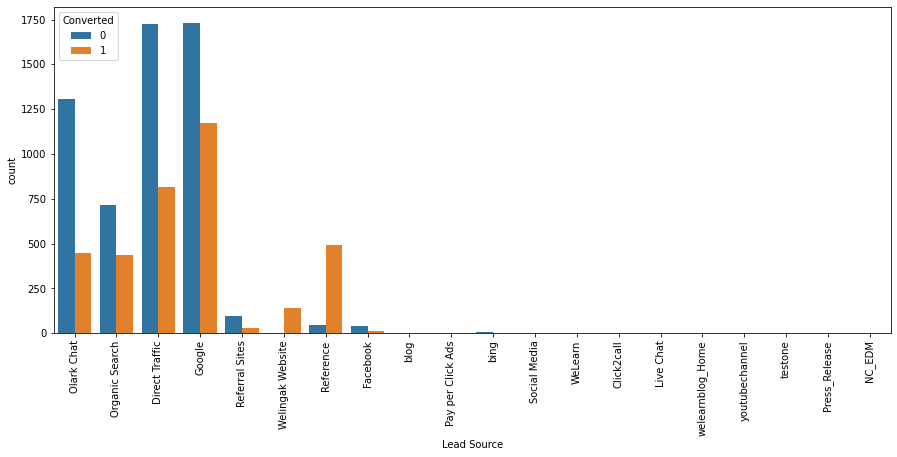

In [49]:
# Countplot
plt.figure(figsize =[15,6])
sns.countplot(x="Lead Source" , data=lead, hue ='Converted')
plt.xticks(rotation=90)
plt.show()

In [50]:
# Lead soucre count
lead['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [51]:
# we will combine smaller 'lead sources' as 'other sources'
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Social Media','Live Chat','Press_Release',
                 'Pay per Click Ads', 'blog','WeLearn', 'welearnblog_Home','youtubechannel','testone',                
                 'NC_EDM'] ,"Others")

In [52]:
# let's see total leads from lead source and leads conversion rate
lead_source_count = lead['Lead Source'].value_counts()
lead_source_percentage = lead['Lead Source'].value_counts(normalize=True)*100
lead_source_conversion_rate = lead.groupby('Lead Source')['Converted'].mean()*100

# concatenate 
result = pd.concat([lead_source_count,lead_source_percentage,lead_source_conversion_rate],axis=1)
result.columns = ['lead_source_count','lead_source_percentage','lead_source_conversion_rate']
result

,lead_source_count,lead_source_percentage,lead_source_conversion_rate
Google,2909,31.482684,40.426263
Direct Traffic,2543,27.521645,32.166732
Olark Chat,1755,18.993506,25.527066
Organic Search,1154,12.489177,37.781629
Reference,534,5.779221,91.760300
Welingak Website,142,1.536797,98.591549
Referral Sites,125,1.352814,24.800000
Facebook,55,0.595238,23.636364
Others,23,0.248918,39.130435


In [53]:
lead_source_conversion_rate = lead_source_conversion_rate.reset_index()

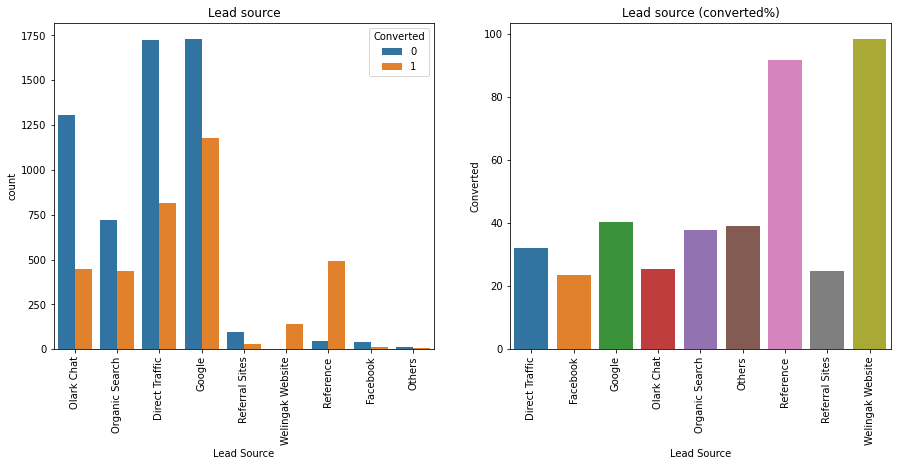

In [54]:
# Running the function again to check the updated 
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(x='Lead Source' , data=lead , hue='Converted')
plt.title("Lead source")
plt.xticks(rotation = 90)

# percentage of converted leads
plt.subplot(1,2,2)
sns.barplot(x='Lead Source' ,y='Converted' ,data=lead_source_conversion_rate)
plt.xticks(rotation=90)
plt.title("Lead source (converted%)")
plt.show()

-  Maximum number of leads are generated from google and direct traffic.
- Conversion rate of leads through reference and Welingak Website are high.
- So "reference" and "Welingak Website" options should be explored more to increase leads.
- And should focus on improving the overall conversion rate of leads from sources like google ,olark chat ,direct traffic,organic search as they generate significant number of leads.
### <font color=darkgreen> Do not email & Do not call</font>

In [55]:
# conversion rate of people who said 'ok' to receive 'mail' and 'call' from the company
print(lead.groupby('Do Not Email')['Converted'].mean()*100)

print('\n')
# call conversion rate
conver_rate = ((lead.groupby('Do Not Call')['Converted'].mean()*100).reset_index())
print(conver_rate)

Do Not Email
No     40.477310
Yes    16.076294
Name: Converted, dtype: float64


  Do Not Call   Converted
0          No   38.525655
1         Yes  100.000000


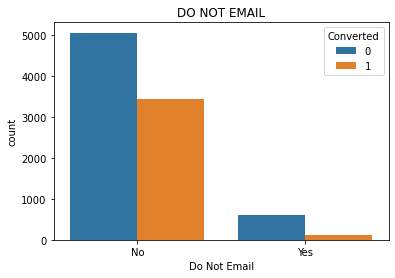

In [56]:
# plotting 
# Do not email
sns.countplot(x='Do Not Email' , hue='Converted' ,data=lead)
plt.title('DO NOT EMAIL')
plt.show()

- Majority of the people said ok to receive email  .People who said ok for mail has around 40% of conversion rate.
- People who have not opted to receive email has less conversion rate.

### <font color = darkgreen>Last Activity</font>

In [57]:
lead['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [58]:
# we will keep considerable 'last activity' and club all other activities to 'Other activity'
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'Approached upfront',  
                       'View in browser link Clicked' ,'Email Received','Email Marked Spam' ,
                    'Visited Booth in Tradeshow','Resubscribed to emails'] ,'Other Activity')

In [59]:
# now lets see total leads and conversion rate of leads from 'last activity'

last_activity_count = lead['Last Activity'].value_counts()
last_activity_perc = lead['Last Activity'].value_counts(normalize=True)*100
conversion_rate = lead.groupby('Last Activity')['Converted'].mean()*100

result = pd.concat([last_activity_count,last_activity_perc,conversion_rate],axis=1)
result.columns = ['last_activity_count','last_activity_perc','conversion_rate']
result.reset_index()

,index,last_activity_count,last_activity_perc,conversion_rate
0,Email Opened,3540,38.311688,37.683616
1,SMS Sent,2745,29.707792,62.914390
2,Olark Chat Conversation,973,10.530303,8.633094
3,Page Visited on Website,640,6.926407,23.593750
4,Converted to Lead,428,4.632035,12.616822
5,Email Bounced,326,3.528139,7.975460
6,Email Link Clicked,267,2.889610,27.340824
7,Form Submitted on Website,116,1.255411,24.137931
8,Unreachable,93,1.006494,33.333333
9,Unsubscribed,61,0.660173,26.229508


In [60]:
conversion_rate=conversion_rate.reset_index()

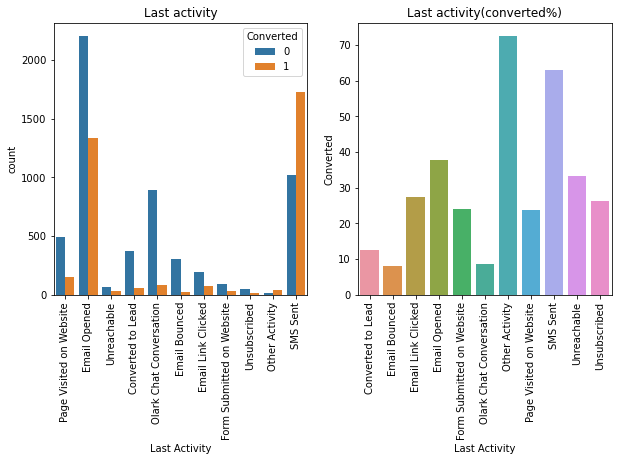

In [61]:
# Last activity
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.countplot(x='Last Activity' ,hue ='Converted',data=lead)
plt.title('Last activity')
plt.xticks(rotation=90)

# last activity converted
plt.subplot(1,2,2)
sns.barplot(x='Last Activity' ,y='Converted' ,data=conversion_rate)
plt.xticks(rotation=90)
plt.title('Last activity(converted%)')

plt.show()

- Most of the lead have their 'email opened' has their last activity.
- Conversion rate of leads with last activity as 'SMS sent' is almost 60%.
- After combining smaller 'last activities' to 'other activity', the lead conversion rate is very high around 80%.

### <font color = darkgreen>Specialization</font>

In [62]:
# let's see total leads and conversion rate of leads from specialization
Speci_lead_count = lead.Specialization.value_counts()
Speci_lead_perc = lead.Specialization.value_counts(normalize=True)*100
Speci_conver_rate = lead.groupby('Specialization')['Converted'].mean()*100

# concatenate
result = pd.concat([Speci_lead_count,Speci_lead_perc,Speci_conver_rate],axis=1)
result.columns = ['Speci_lead_count','Speci_lead_perc','Speci_conver_rate']
result

,Speci_lead_count,Speci_lead_perc,Speci_conver_rate
Others,3380,36.580087,28.668639
Finance Management,976,10.562771,44.672131
Human Resource Management,848,9.177489,45.754717
Marketing Management,838,9.069264,48.687351
Operations Management,503,5.443723,47.316103
Business Administration,403,4.361472,44.416873
IT Projects Management,366,3.961039,38.251366
Supply Chain Management,349,3.777056,43.266476
"Banking, Investment And Insurance",338,3.658009,49.408284
Travel and Tourism,203,2.196970,35.467980


In [63]:
Speci_conver_rate = Speci_conver_rate.reset_index()

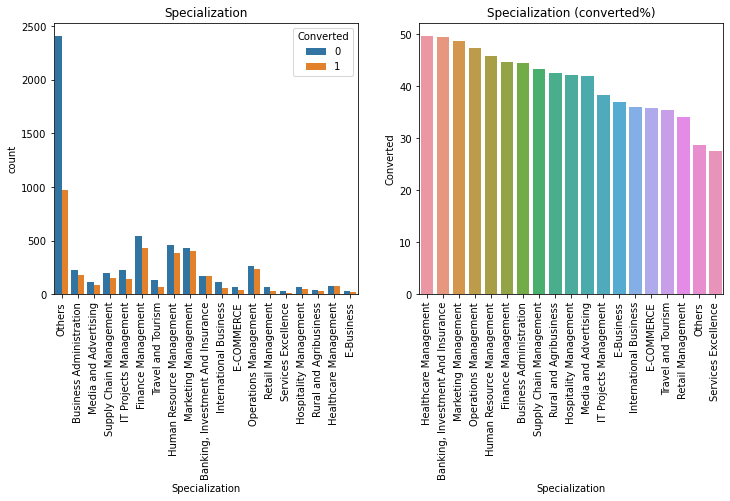

In [64]:
# plot 
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sns.countplot(x='Specialization',hue='Converted',data=lead)
plt.xticks(rotation=90)
plt.title('Specialization')



# conversion rate
plt.subplot(1,2,2)
sns.barplot(x='Specialization',y='Converted',data=Speci_conver_rate,
           order = Speci_conver_rate.sort_values('Converted' ,ascending=False)['Specialization'])
plt.xticks(rotation =90)
plt.title('Specialization (converted%)')


plt.show()

- Specialization was not specified by most of the leads, and around 38% of leads fall in this category.
- Leads with Finance Management ,Human Resource Management & Marketing Management are high and their conversion rate is around 45%.
### <font color = darkgreen>Occupation</font>

In [65]:
# let's see total leads and converted leads rate from occupation
lead_perc = lead.Occupation.value_counts(normalize = True)*100
lead_conver_rate = lead.groupby('Occupation')['Converted'].mean()*100
# concatenate them
result = pd.concat([lead_perc,lead_conver_rate],axis=1)
result.columns = ['lead_perc','lead_conver_rate']
result

,lead_perc,lead_conver_rate
Unemployed,60.606061,43.589286
Unknown,29.112554,13.754647
Working Professional,7.640693,91.643059
Student,2.272727,37.142857
Other,0.173160,62.500000
Housewife,0.108225,100.000000
Businessman,0.086580,62.500000


In [66]:
lead_conver_rate=lead_conver_rate.reset_index()

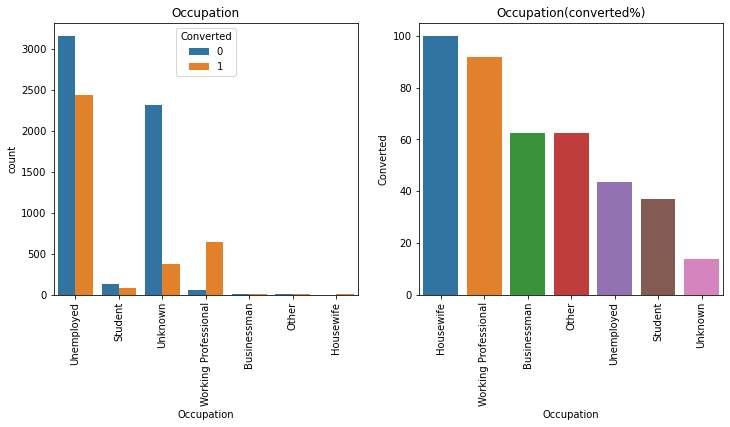

In [67]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sns.countplot(x='Occupation',hue='Converted',data=lead)
plt.xticks(rotation=90)
plt.title('Occupation')


# conversion rate
plt.subplot(1,2,2)
sns.barplot(x='Occupation',y='Converted',data=lead_conver_rate , 
            order = lead_conver_rate.sort_values('Converted' ,ascending=False)['Occupation'])
plt.xticks(rotation =90)
plt.title('Occupation(converted%)')


plt.show()

- There are fewer leads from housewife category but conversion rate is 100%.
- Most of the leads are from Unemployed category but their conversion rate is very low so we should focus more on unemployed leads for conversion.
- "Working professionals ,businessman and Other" occupation leads are having high conversion rate.So we need to focus on this occupation to generate more leads.

#### <font color = darkgreen>Search ,Newspaper Article, X Education Forums, Newspaper, Digital Advertisement,Recommendation, Free Copy</font>


In [68]:
# search
count = lead['Search'].value_counts()
count

No     9226
Yes      14
Name: Search, dtype: int64

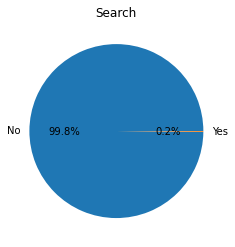

In [69]:
plt.pie(count ,autopct ='%1.1f%%' , labels =['No','Yes'])
plt.title('Search')
plt.show()

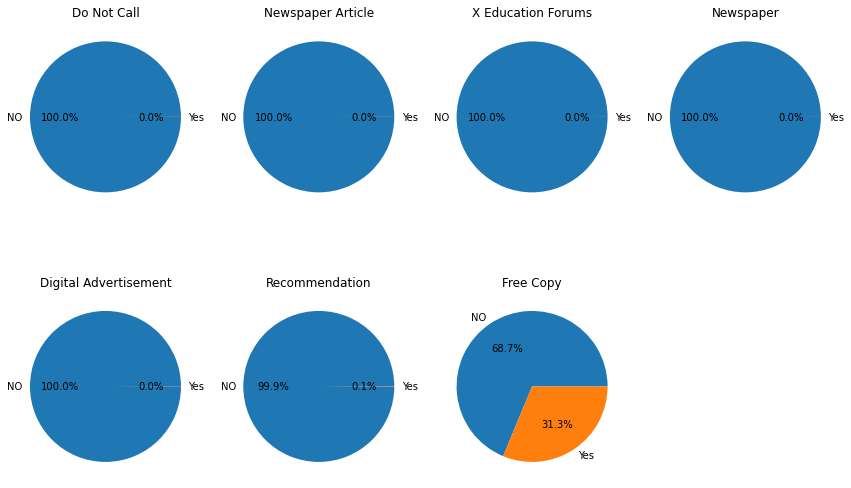

In [70]:
def pieplot(col):
    counts = lead[col].value_counts()
    plt.pie(counts ,autopct = '%1.1f%%' , labels=['NO','Yes'])
    plt.title(col)
    return counts


columns = ['Do Not Call','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 
       'Recommendation', 'Free Copy']
plt.figure(figsize=[12,8])
i=1
for each_col in columns:
    plt.subplot(2,4,i)
    pieplot(each_col)
    i = i+1
plt.tight_layout()
plt.show()

In [71]:
#free copy conversion rate of lead
free_copy_perc = lead['Free Copy'].value_counts(normalize=True)*100
conver_rate = lead.groupby('Free Copy')['Converted'].mean()*100
r = pd.concat([free_copy_perc,conver_rate],axis=1)
r

,Free Copy,Converted
No,68.744589,39.845718
Yes,31.255411,35.664820


- Search, Do not call ,Newspaper article ,xeducation forum , newspaper ,digital advertisement : Indicates whether the customer had seen the ad in any of the listed items.
- Recommendation : Indicates whether the customer came in through recommendations.
- Most entries are 'No'. From this no inference can be drawn.
- Free copy : Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
- Search, Newspaper article, xeducation forum, newspaper, digital advertisement & Recommendation are heavily skewed and unlikely to add any value to the model so we will drop them.
- Free copy don't add much value as conversion rate is almost same.

In [72]:
# let's drop this column
lead.drop(['Search','Do Not Call','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 
       'Recommendation', 'Free Copy'],axis=1 ,inplace =True)
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

In [73]:
len(lead.columns)

10

### <font color= purple>Univariate analysis - Numerical</font>

In [74]:
numeric_col

array(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

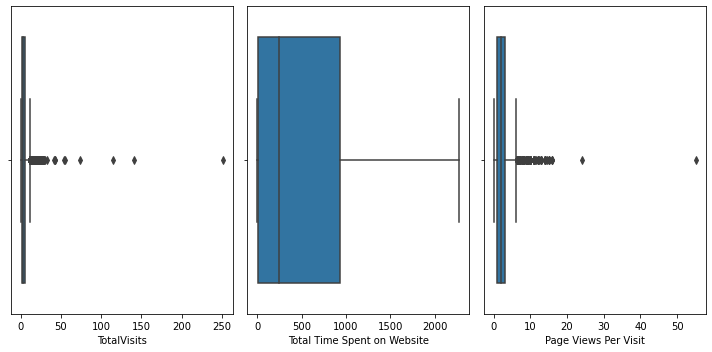

In [75]:
# boxplot of totalvisits
plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
sns.boxplot(x='TotalVisits',data=lead)

# Total time spent on website
plt.subplot(1,3,2)
sns.boxplot(x='Total Time Spent on Website',data=lead)

# page views per visit
plt.subplot(1,3,3)
sns.boxplot(x='Page Views Per Visit' , data=lead)
plt.tight_layout()
plt.show()

In [76]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [77]:
# Checking the detailed percentile values
lead.describe(percentiles = [0.1 ,0.05,0.25,0.75,0.90,0.95,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000


- We can see there are so many outliers in "Totalvisists" and "Page Views Per Visit".We will cap the outliers to 95th percentile.

In [78]:
percentiles = lead['TotalVisits'].quantile(0.95)
percentiles

10.0

In [79]:
# capping the Totalvisits data at 95th percetile
lead['TotalVisits'][lead['TotalVisits'] >=percentiles] = percentiles


In [80]:
# lets see number of rows getting capped 
lead['TotalVisits'][lead['TotalVisits'] >=percentiles]

12      10.0
56      10.0
58      10.0
59      10.0
102     10.0
        ... 
9100    10.0
9132    10.0
9138    10.0
9229    10.0
9233    10.0
Name: TotalVisits, Length: 467, dtype: float64

In [81]:
# capping 'page views per visit' at 95th percentile
percentiles = lead['Page Views Per Visit'].quantile(0.95)
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >=percentiles] = percentiles


In [82]:
# lets see number of rows getting capped 
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >=percentiles]

10      6.0
12      6.0
15      6.0
17      6.0
27      6.0
       ... 
9216    6.0
9219    6.0
9222    6.0
9223    6.0
9229    6.0
Name: Page Views Per Visit, Length: 604, dtype: float64

- Total number of rows getting capped for "totalvisits" and "page views per visit" columns are 467 and 604.
- Number of rows getting capped are quite high. This is the reason we are capping them instead of deleting.

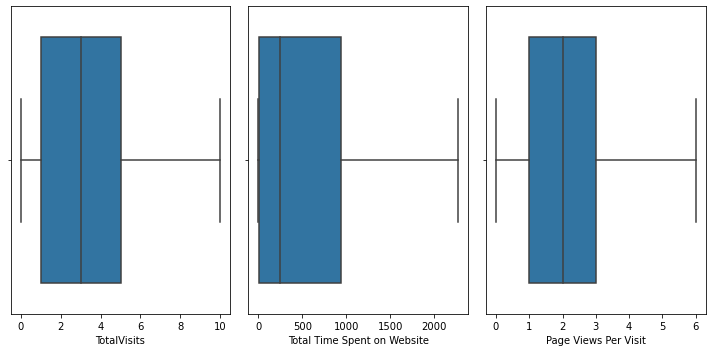

In [83]:
# Total visits
plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
sns.boxplot(x='TotalVisits',data=lead)

# Total time spent on website
plt.subplot(1,3,2)
sns.boxplot(x='Total Time Spent on Website',data=lead)

# page views per visit
plt.subplot(1,3,3)
sns.boxplot(x='Page Views Per Visit' , data=lead)
plt.tight_layout()
plt.show()

## <font color= purple>Bivariate analysis</font>

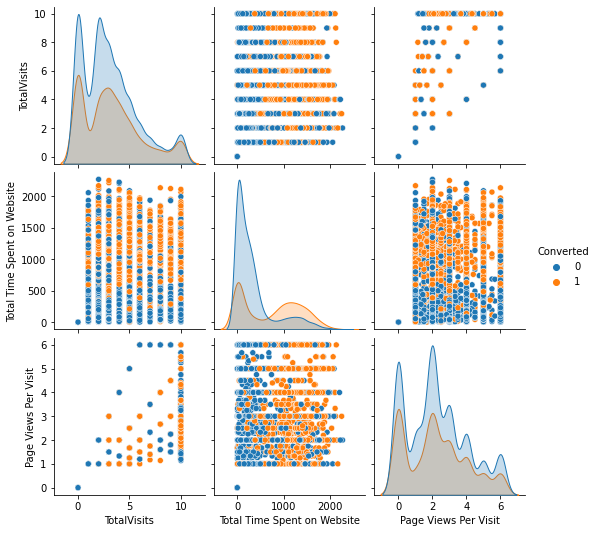

In [84]:
sns.pairplot(lead[numeric_col],hue='Converted')
plt.show()

- Data is not normally distributed.
# <font color= purple>6.Data Preparation</font>
###### <font color= darkgreen>Converting Binary categories</font>

In [85]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


In [86]:
lead.nunique()

Lead Origin                       5
Lead Source                       9
Do Not Email                      2
Converted                         2
TotalVisits                      11
Total Time Spent on Website    1731
Page Views Per Visit             91
Last Activity                    11
Specialization                   19
Occupation                        7
dtype: int64

In [87]:
# applying map func to convert yes/no to 1/0
lead['Do Not Email'] = lead[['Do Not Email']].apply(lambda x : x.map({'Yes':1,'No':0}))
lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

### <font color= purple>Dummy vars</font>

In [88]:
# for categorical vars with multiple levels ,create dummy vars(one-hot encoded)
dummy = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','Specialization','Occupation']] ,
                       drop_first=True)


In [89]:
# adding result to main dataframe
lead = pd.concat([lead,dummy],axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [90]:
# we have created dummies for below vars so we can drop them 
lead = lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Occupation'] ,axis=1)
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [91]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

### <font color= purple>Heatmap</font>

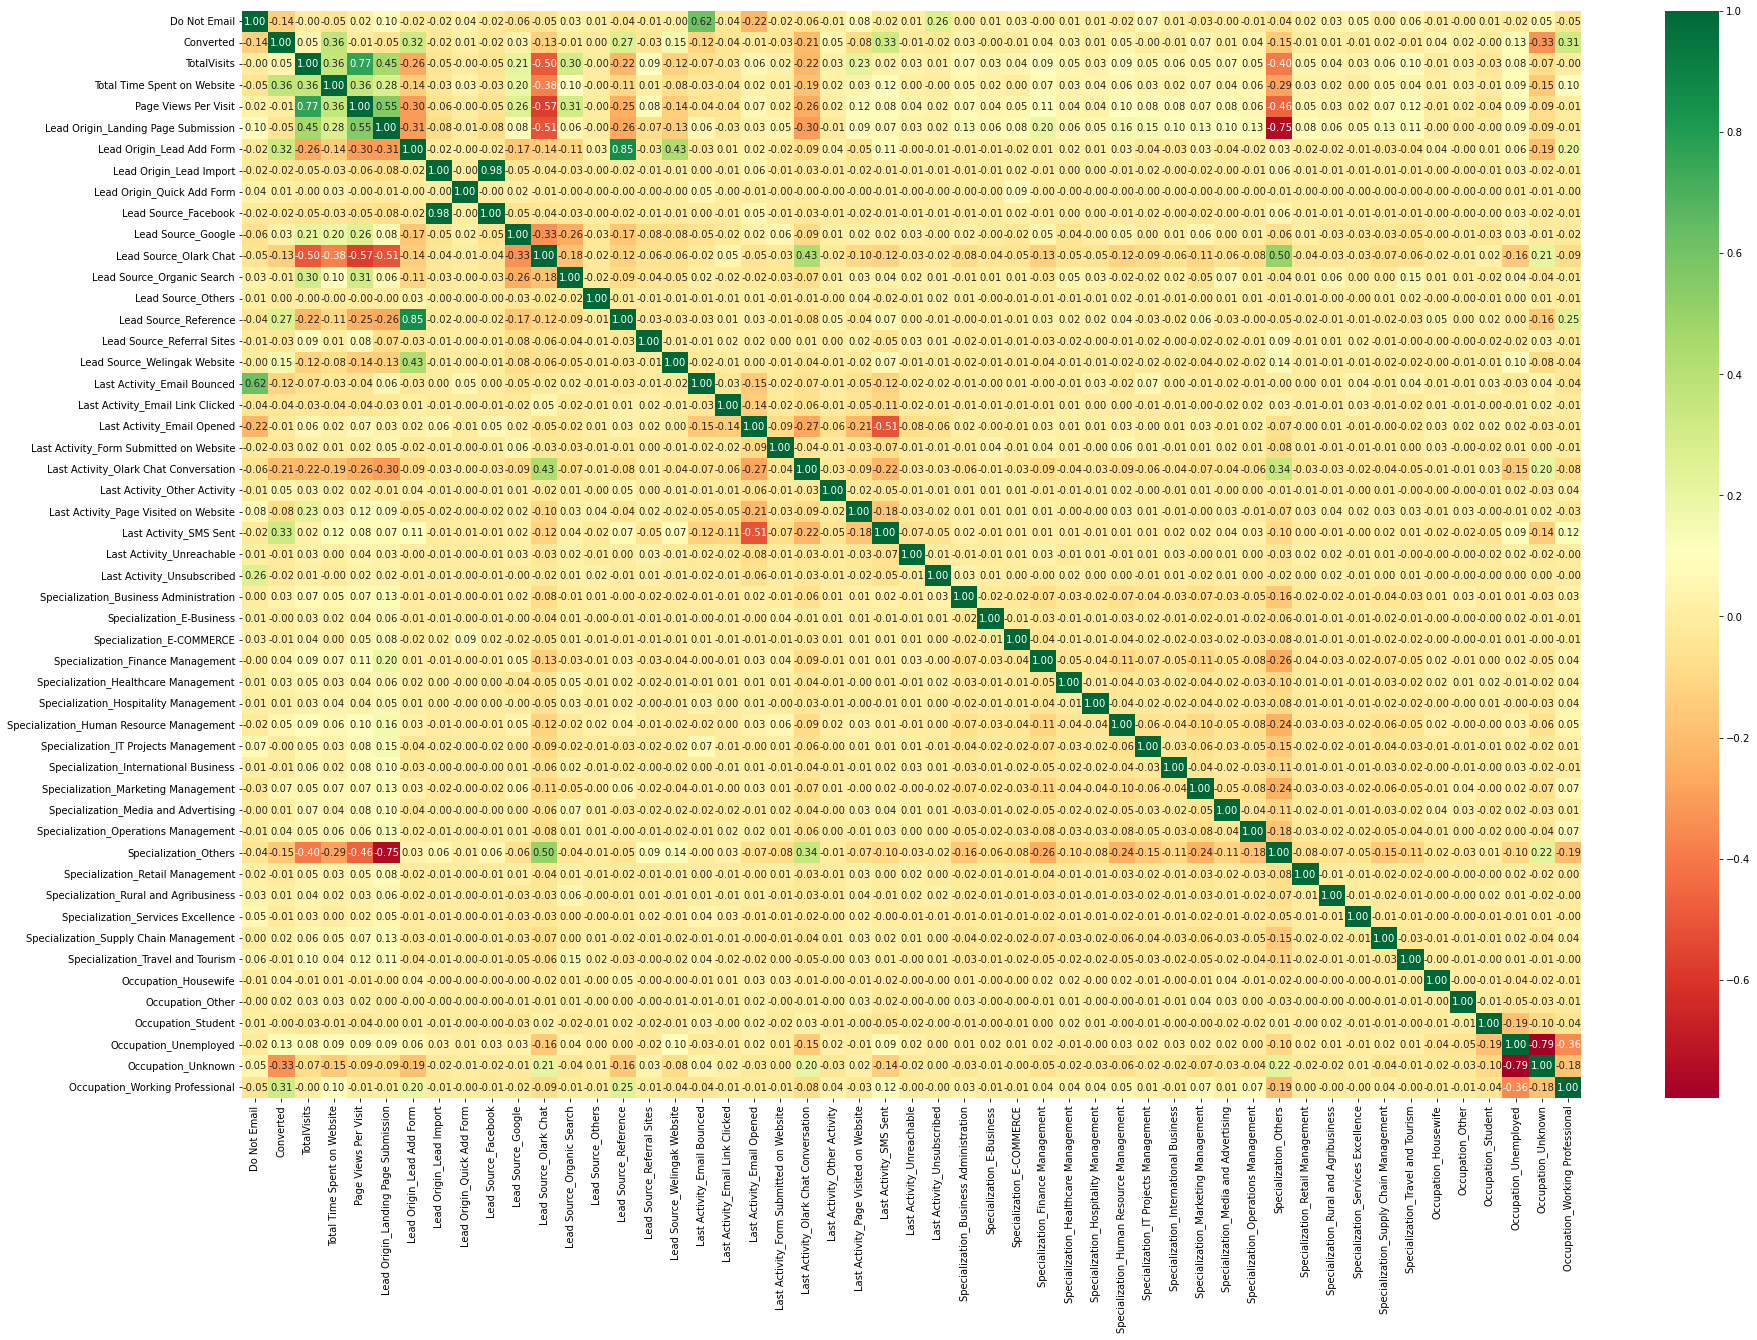

In [92]:
# Visualising the data using barplot
plt.figure(figsize=[30,20])
sns.heatmap(lead.corr(),annot=True , cmap='RdYlGn' ,fmt='.2f')
plt.show()

- There are 51 columns in heatmap which makes it difficult to interpret.

# <font color=purple>Train Test Split</font>

In [93]:
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [94]:
X = lead.drop(['Converted'] ,axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6468, 50)
(6468,)
(2772, 50)
(2772,)


# <font color= purple> Feature Scaling </font>
- Scaling helps us in faster convergence of gradient descent.
- Standard scaler centers mean to 0 
     - The formula for standardising a value in a dataset is given by:
     - (X − μ)/σ

In [97]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

In [98]:
# Creating an object of the class 
scaler = StandardScaler()

In [99]:
# fit and transform data
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                              'Total Time Spent on Website','Page Views Per Visit']])


In [100]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


# <font color= midnightblue>7.Model Building</font>
## <font color= purple>Feature selection using RFE</font>
- <font color= darkcyan>Now that we built our first model based on the summary statistics, we inferred that many of the variables might be insignificant and hence, we need to do some feature elimination.</font>
- <font color= darkcyan>Since the number of features is huge, let's first start with an automated feature selection technique (RFE) and then move to manual feature elimination (using p-values and VIFs)</font> 

In [101]:
# import logistic regression & rfe 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [102]:
# creating an object of class logistic regression
lr = LogisticRegression()

In [103]:
# Create and object of class RFE
rfe = RFE(lr, n_features_to_select = 20)
rfe.fit(X_train , y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [104]:
# Checking the output of RFE
list(zip(X_train.columns,rfe.support_ ,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent'

In [105]:
# select 20 columns
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Occupation_Housewife',
       'Occupation_Unknown', 'Occupation_Working Professional'],
      dtype='object')

In [106]:
# let's see columns which eleminated after rfe
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Managemen

## <font color= palevioletred>Manual Feature Reduction</font>
## <font color= darkcyan>Model 1</font>

In [107]:
X_train_rfe = X_train[rfe_col]

In [108]:
# adding constant 
import statsmodels.api as sm

In [109]:
X_train_sm = sm.add_constant(X_train_rfe)

# building logistic regression model and fitting it
logm1 = sm.GLM(y_train, X_train_sm , sm.families.Binomial()).fit()
logm1

In [110]:
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.5
Date:                Thu, 06 Apr 2023   Deviance:                       5200.9
Time:                        09:53:00   Pearson chi2:                 8.03e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7869      0.150     -5.233      0.000      -1.082      -0.492
Do Not Email                             -1.1731      0.182     -6.435      0.000      -1.530      -0.816
Total Time Spent on Website               1.0654      0.040     26.623      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0426      0.129     -8.058      0.000      -1.296      -0.789
Lead Origin_Lead Add Form                 2.7686      0.204     13.566      0.000       2.369       3.169
Lead Source_Facebook                     -0.6626      0.523     -1.267      0.205      -1.687       0.362
Lead Source_Olark Chat                    1.0824      0.124      8.742      0.000       0.840       1.325
Lead Source_Welingak Website              2.4808      0.750      3.309      0.001       1.011       3.950
Last Activity_Email Opened                0.7348      0.110      6.660      0.000       0.519       0.951
Last Activity_Olark Chat Conversation    -0.6021      0.192     -3.141      0.002      -0.978      -0.226
Last Activity_Other Activity              2.2497      0.488      4.608      0.000       1.293       3.207
Last Activity_SMS Sent                    1.8816      0.112     16.847      0.000       1.663       2.100
Last Activity_Unreachable                 0.8678      0.368      2.361      0.018       0.147       1.588
Last Activity_Unsubscribed                1.3689      0.484      2.829      0.005       0.421       2.317
Specialization_Hospitality Management    -0.9777      0.328     -2.978      0.003      -1.621      -0.334
Specialization_Others                    -0.9752      0.124     -7.870      0.000      -1.218      -0.732
Specialization_Retail Management         -0.4160      0.337     -1.236      0.217      -1.076       0.244
Specialization_Rural and Agribusiness     0.5288      0.390      1.357      0.175      -0.235       1.293
Occupation_Housewife                     22.7618   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Occupation_Unknown                       -1.0783      0.088    -12.306      0.000      -1.250      -0.907
Occupation_Working Professional           2.4080      0.190     12.683      0.000       2.036       2.780
=========================================================================================================
"""

# <font color= mediumvioletred>VIF</font>

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns

# VIF VALUES
vif['VIF'] =[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
# sorting
vif = vif.sort_values(by ='VIF' , ascending =False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.01
14,Specialization_Others,2.78
7,Last Activity_Email Opened,2.58
10,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
8,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
18,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


- We will drop Occupation_Housewife	feature due to high p value i.e., 0.99.
## <font color=darkcyan>Model 2 </font>

In [113]:
rfe_col_2 = rfe_col.drop('Occupation_Housewife')
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Occupation_Housewife',
       'Occupation_Unknown', 'Occupation_Working Professional'],
      dtype='object')

In [114]:
X_train_rfe = X_train[rfe_col_2]

In [115]:
# add constan
X_train_sm = sm.add_constant(X_train_rfe)

#build model
logm2 = sm.GLM(y_train ,X_train_sm ,sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Thu, 06 Apr 2023   Deviance:                       5214.0
Time:                        09:53:01   Pearson chi2:                 8.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7773      0.150     -5.180      0.000      -1.071      -0.483
Do Not Email                             -1.1788      0.182     -6.468      0.000      -1.536      -0.822
Total Time Spent on Website               1.0644      0.040     26.627      0.000       0.986       1.143
Lead Origin_Landing Page Submission      -1.0381      0.129     -8.029      0.000      -1.292      -0.785
Lead Origin_Lead Add Form                 2.7849      0.204     13.661      0.000       2.385       3.184
Lead Source_Facebook                     -0.6639      0.523     -1.270      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0818      0.124      8.740      0.000       0.839       1.324
Lead Source_Welingak Website              2.4637      0.750      3.286      0.001       0.994       3.933
Last Activity_Email Opened                0.7327      0.110      6.663      0.000       0.517       0.948
Last Activity_Olark Chat Conversation    -0.6074      0.192     -3.171      0.002      -0.983      -0.232
Last Activity_Other Activity              2.2402      0.488      4.588      0.000       1.283       3.197
Last Activity_SMS Sent                    1.8716      0.111     16.805      0.000       1.653       2.090
Last Activity_Unreachable                 0.8567      0.368      2.331      0.020       0.136       1.577
Last Activity_Unsubscribed                1.3645      0.484      2.820      0.005       0.416       2.313
Specialization_Hospitality Management    -0.9849      0.328     -3.000      0.003      -1.628      -0.341
Specialization_Others                    -0.9793      0.124     -7.907      0.000      -1.222      -0.737
Specialization_Retail Management         -0.4224      0.336     -1.256      0.209      -1.082       0.237
Specialization_Rural and Agribusiness     0.5204      0.390      1.336      0.182      -0.243       1.284
Occupation_Unknown                       -1.0822      0.088    -12.359      0.000      -1.254      -0.911
Occupation_Working Professional           2.3994      0.190     12.643      0.000       2.027       2.771
=========================================================================================================
"""

# <font color=mediumvioletred> VIF </font>

In [116]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF' ,ascending =False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.00
14,Specialization_Others,2.78
7,Last Activity_Email Opened,2.57
10,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
8,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
17,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


- we will drop 'Specialization_Retail Management'	feature due to high p value :0.209.VIF values are significant.
# <font color= darkcyan> Model3 </font>

In [117]:
# dropping Specialization_Retail Management	
rfe_col_3 = rfe_col_2.drop('Specialization_Retail Management')

In [118]:
X_train_rfe = X_train[rfe_col_3]

In [119]:
# add constant
X_train_sm = sm.add_constant(X_train_rfe)
# build model
logm3 = sm.GLM(y_train ,X_train_sm ,sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.8
Date:                Thu, 06 Apr 2023   Deviance:                       5215.6
Time:                        09:53:02   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7834      0.150     -5.222      0.000      -1.077      -0.489
Do Not Email                             -1.1828      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0628      0.040     26.621      0.000       0.985       1.141
Lead Origin_Landing Page Submission      -1.0411      0.129     -8.050      0.000      -1.295      -0.788
Lead Origin_Lead Add Form                 2.7834      0.204     13.653      0.000       2.384       3.183
Lead Source_Facebook                     -0.6640      0.522     -1.271      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0789      0.124      8.719      0.000       0.836       1.321
Lead Source_Welingak Website              2.4644      0.750      3.287      0.001       0.995       3.934
Last Activity_Email Opened                0.7357      0.110      6.692      0.000       0.520       0.951
Last Activity_Olark Chat Conversation    -0.6033      0.192     -3.150      0.002      -0.979      -0.228
Last Activity_Other Activity              2.2470      0.488      4.604      0.000       1.290       3.204
Last Activity_SMS Sent                    1.8734      0.111     16.819      0.000       1.655       2.092
Last Activity_Unreachable                 0.8548      0.368      2.320      0.020       0.133       1.577
Last Activity_Unsubscribed                1.3745      0.484      2.841      0.004       0.426       2.323
Specialization_Hospitality Management    -0.9772      0.328     -2.977      0.003      -1.621      -0.334
Specialization_Others                    -0.9745      0.124     -7.869      0.000      -1.217      -0.732
Specialization_Rural and Agribusiness     0.5275      0.389      1.354      0.176      -0.236       1.291
Occupation_Unknown                       -1.0816      0.088    -12.353      0.000      -1.253      -0.910
Occupation_Working Professional           2.3991      0.190     12.636      0.000       2.027       2.771
=========================================================================================================
"""

# <font color = mediumvioletred> VIF </font>

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF' ,ascending =False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.99
14,Specialization_Others,2.78
7,Last Activity_Email Opened,2.57
10,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
8,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
16,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


- 'Lead Source_Facebook' is not significant. We will drop 'Lead Source_Facebook' due to high p value:0.204.
# <font color= darkcyan> Model4</font>

In [121]:
# dropping Lead Source_Facebook
rfe_col_4 = rfe_col_3.drop('Lead Source_Facebook')

In [122]:
X_train_rfe = X_train[rfe_col_4]

# add constant
X_train_sm = sm.add_constant(X_train_rfe)

# build model4
logm4 = sm.GLM(y_train , X_train_sm ,sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.7
Date:                Thu, 06 Apr 2023   Deviance:                       5217.4
Time:                        09:53:03   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7996      0.149     -5.351      0.000      -1.092      -0.507
Do Not Email                             -1.1830      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0655      0.040     26.715      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0226      0.128     -7.968      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8043      0.203     13.797      0.000       2.406       3.203
Lead Source_Olark Chat                    1.0978      0.123      8.926      0.000       0.857       1.339
Lead Source_Welingak Website              2.4624      0.750      3.284      0.001       0.993       3.932
Last Activity_Email Opened                0.7300      0.110      6.643      0.000       0.515       0.945
Last Activity_Olark Chat Conversation    -0.6028      0.192     -3.147      0.002      -0.978      -0.227
Last Activity_Other Activity              2.2481      0.488      4.604      0.000       1.291       3.205
Last Activity_SMS Sent                    1.8703      0.111     16.792      0.000       1.652       2.089
Last Activity_Unreachable                 0.8558      0.369      2.322      0.020       0.134       1.578
Last Activity_Unsubscribed                1.3743      0.484      2.840      0.005       0.426       2.323
Specialization_Hospitality Management    -0.9888      0.327     -3.020      0.003      -1.630      -0.347
Specialization_Others                    -0.9715      0.124     -7.861      0.000      -1.214      -0.729
Specialization_Rural and Agribusiness     0.5291      0.390      1.358      0.174      -0.234       1.293
Occupation_Unknown                       -1.0808      0.088    -12.341      0.000      -1.252      -0.909
Occupation_Working Professional           2.3977      0.190     12.633      0.000       2.026       2.770
=========================================================================================================
"""

# <font color= mediumvioletred> VIF</font>

In [123]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF' ,ascending =False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.98
13,Specialization_Others,2.77
6,Last Activity_Email Opened,2.55
9,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
15,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


- 'Specialization_Rural and Agribusiness' is insignificant. We will drop 'Specialization_Rural and Agribusiness' due to high p value i.e.,0.174.
# <font color= darkcyan> Model 5</font>

In [124]:
rfe_col_5 = rfe_col_4.drop('Specialization_Rural and Agribusiness')

In [125]:
X_train_rfe = X_train[rfe_col_5]

# add constant
X_train_sm = sm.add_constant(X_train_rfe)
# build model 5
logm5 = sm.GLM(y_train ,X_train_sm ,sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.6
Date:                Thu, 06 Apr 2023   Deviance:                       5219.2
Time:                        09:53:03   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4069
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7911      0.149     -5.302      0.000      -1.084      -0.499
Do Not Email                             -1.1811      0.182     -6.492      0.000      -1.538      -0.824
Total Time Spent on Website               1.0651      0.040     26.711      0.000       0.987       1.143
Lead Origin_Landing Page Submission      -1.0227      0.128     -7.972      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8029      0.203     13.794      0.000       2.405       3.201
Lead Source_Olark Chat                    1.0993      0.123      8.940      0.000       0.858       1.340
Lead Source_Welingak Website              2.4629      0.750      3.285      0.001       0.993       3.932
Last Activity_Email Opened                0.7288      0.110      6.636      0.000       0.514       0.944
Last Activity_Olark Chat Conversation    -0.6068      0.191     -3.169      0.002      -0.982      -0.231
Last Activity_Other Activity              2.2419      0.488      4.592      0.000       1.285       3.199
Last Activity_SMS Sent                    1.8672      0.111     16.782      0.000       1.649       2.085
Last Activity_Unreachable                 0.8487      0.368      2.303      0.021       0.126       1.571
Last Activity_Unsubscribed                1.3906      0.485      2.865      0.004       0.439       2.342
Specialization_Hospitality Management    -0.9951      0.327     -3.040      0.002      -1.637      -0.353
Specialization_Others                    -0.9785      0.123     -7.927      0.000      -1.220      -0.737
Occupation_Unknown                       -1.0818      0.088    -12.357      0.000      -1.253      -0.910
Occupation_Working Professional           2.3966      0.190     12.627      0.000       2.025       2.769
=========================================================================================================
"""

# <font color = mediumvioletred> VIF </font>

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF' ,ascending =False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.97
13,Specialization_Others,2.77
6,Last Activity_Email Opened,2.55
9,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
14,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


- P value and VIF of all vars are significant.

In [127]:
# finding predictive value on train data set
y_train_pred = logm5.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.52348619, 0.113305  , 0.33673309, ..., 0.292254  , 0.09170757,
       0.12279049])

In [128]:
# creating a dataframe
y_train_pred_final = pd.DataFrame({'converted':y_train.values,'converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,converted,converted_prob,Prospect ID
0,0,0.523486,1871
1,0,0.113305,6795
2,0,0.336733,3516
3,0,0.818686,8105
4,0,0.292254,3934


In [129]:
# creating a new column predicted and taking 0.5 as a threshold value
y_train_pred_final['Predicted'] = y_train_pred_final.converted_prob.map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,Prospect ID,Predicted
0,0,0.523486,1871,1
1,0,0.113305,6795,0
2,0,0.336733,3516,0
3,0,0.818686,8105,1
4,0,0.292254,3934,0


# <font color=navy>8.Model Evaluation : Train dataset</font>
##### <font color=purple> Confusion matrix & Accuracy score</font>

In [130]:
# import metrics 
from sklearn import metrics

In [131]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.converted ,y_train_pred_final.Predicted)
confusion

array([[3548,  454],
       [ 717, 1749]])

In [132]:
# accuracy score
accuracy = metrics.accuracy_score(y_train_pred_final.converted ,y_train_pred_final.Predicted)

In [133]:
    # predicted    negative      positive
    # Actual 
# negative :      3548          454
# positive :      717           1749

### <font color=purple>Metrics beyond simple accuracy</font>

In [134]:
TN = confusion[0,0]   # true negative
FP = confusion[0,1]   # false positive
FN = confusion[1,0]   # false negative
TP = confusion[1,1]   # true positive

In [135]:
# sensitivity ,specificity ,precision, recall, True positive rate(TPR), False positive rate(FPR), 
# positive prediction value, Negative prediction value

sensi  = TP/(TP+FN)     # actual positive
speci  = TN/(TN+FP)     # actual negative

precision = TP/(TP+FP)  # predicted positive
recall    = TP/(TP+FN)  # actual positive

TPR = TP/(TP+FN)       # actual positive
TNR = TN/(TN+FP)       # actual negative
FPR = FP/(FN+FP)       # actual false positive 
FNR = FN/(FN+TP)      # actual false negative

posi_pred_val =  TP/(TP+FP)       # predicted positive
neg_pred_val  =  TN/(TN+FN)       # negative predicted

print("Accuracy  :" , round(accuracy*100,2),"%")
print("Sensitivity :" , round(sensi*100,2),"%")
print("Specificity :" , round(speci*100,2),"%")
print("Precision :" , round(precision*100,2),"%")
print("Recall    :" , round(recall*100,2),"%")

print("TPR :",round(TPR*100,2),"%")
print("TNR :",round(TNR*100,2),"%")

print("FPR :",round(FPR*100,2),"%")

print("FNR :",round(FNR*100,2),"%")

print("Positive predicted value :",round(posi_pred_val*100,2),"%")

print("negative predicted value :",round(neg_pred_val*100,2),"%")



Accuracy  : 81.9 %
Sensitivity : 70.92 %
Specificity : 88.66 %
Precision : 79.39 %
Recall    : 70.92 %
TPR : 70.92 %
TNR : 88.66 %
FPR : 38.77 %
FNR : 29.08 %
Positive predicted value : 79.39 %
negative predicted value : 83.19 %


# <font color=purple> Finding the optimal cutoff point</font>

In [136]:
# let's create columns with different probability cutoffs
numbers = [float(x/10) for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.converted_prob.map(lambda x : 1 if x >i else 0)
y_train_pred_final.head()

,converted,converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.523486,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.113305,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.336733,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.818686,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.292254,3934,0,1,1,1,0,0,0,0,0,0,0


- accuracy : (TP+TN)/(TP+TN+FP+FN).

In [137]:
# Let's calculate sensitivity ,specificity, accuarcy for various cutoffs
cut_off = pd.DataFrame(columns =['Probability','accuracy','Sensitivity','Specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    confusion1 = metrics.confusion_matrix(y_train_pred_final.converted ,y_train_pred_final[i])
    total = sum(sum(confusion1))
    
    # now lets find accuracy, sensitivity,specificity
    accu = (confusion1[0,0]+confusion1[1,1])/total
    sensi = confusion1[1,1]/(confusion1[1,1]+confusion1[1,0])
    speci = confusion1[0,0]/(confusion1[0,0]+confusion1[0,1])
    cut_off.loc[i] = [i ,accu,sensi,speci]
print(cut_off)

     Probability  accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.632653     0.973236     0.422789
0.2          0.2  0.763760     0.916058     0.669915
0.3          0.3  0.800402     0.848743     0.770615
0.4          0.4  0.817718     0.775345     0.843828
0.5          0.5  0.818955     0.709246     0.886557
0.6          0.6  0.804267     0.613950     0.921539
0.7          0.7  0.785250     0.525142     0.945527
0.8          0.8  0.764069     0.431468     0.969015
0.9          0.9  0.713358     0.266423     0.988756


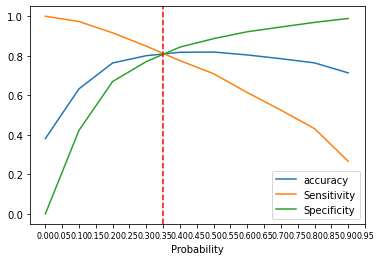

In [138]:
# Let's plot accuracy ,sensitivity ,specificity for various probabilities

cut_off.plot.line(x = 'Probability' ,y =['accuracy', 'Sensitivity','Specificity'])
plt.axvline(x = 0.35,color='r',linestyle='--')

plt.xticks(np.arange(0,1,step = 0.05),size=8)
plt.show()

- From the above graph 0.35 seems to be a cutoff point.

In [139]:
# predicted value for optimum threshold i.e., 0.35 is 
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map(lambda k : 1 if k>0.35 else 0)
y_train_pred_final.head(20)

,converted,converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.523486,1871,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.113305,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.336733,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.818686,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.292254,3934,0,1,1,1,0,0,0,0,0,0,0,0
5,1,0.988274,4844,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.134427,3297,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.998294,8071,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0.099210,987,0,1,0,0,0,0,0,0,0,0,0,0
9,1,0.900311,7423,1,1,1,1,1,1,1,1,1,1,1,1


In [140]:
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis=1,inplace=True)
y_train_pred_final.head()

,converted,converted_prob,Prospect ID,Predicted,final_predicted
0,0,0.523486,1871,1,1
1,0,0.113305,6795,0,0
2,0,0.336733,3516,0,0
3,0,0.818686,8105,1,1
4,0,0.292254,3934,0,0


# <font color =purple> Lead Score </font>

In [141]:
# lets assign leads score for the leads in the Train dataset
y_train_pred_final['Lead Score'] = (y_train_pred_final.converted_prob*100).astype('int64')
# or y_train_pred_final['lead score'] = y_train_pred_final.converted_prob.map(lambda x : round(x*100))
y_train_pred_final.sort_values(by ='converted_prob' ,ascending=False)

,converted,converted_prob,Prospect ID,Predicted,final_predicted,Lead Score
3115,1,0.999473,2656,1,1,99
4891,1,0.999463,8074,1,1,99
1229,0,0.999170,8057,1,1,99
6312,1,0.999102,3428,1,1,99
6187,1,0.998930,7579,1,1,99
...,...,...,...,...,...,...
2016,0,0.004609,976,0,0,0
4946,0,0.004449,3300,0,0,0
3282,0,0.004097,5381,0,0,0
1457,0,0.003618,5279,0,0,0


- Higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

### <font color =violetred> Confusion matrix</font>

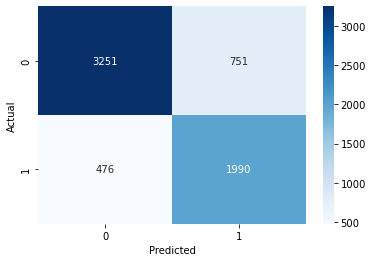

In [142]:
conf_matrix = metrics.confusion_matrix(y_train_pred_final['converted'], y_train_pred_final['final_predicted'])
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [175]:
 # predicted      not converted       converted
# actual  
# not converted        3251              751        # 3251 leads didn't converted to customers 
#    converted         476               1990       # 1990 leads converted to customers


In [144]:
# let's check the accuracy 
accuracy = metrics.accuracy_score(y_train_pred_final['converted'] , y_train_pred_final.final_predicted)
accuracy

0.8102968460111317

In [145]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [146]:
# Sensitivity,Specificity,True Positive Rate (TPR) ,False Positive Rate (FPR)
sensi = TP/(TP+FN)
speci = TN/(TN+FP)
TPR   = TP/(TP+FN)
FPR   = FP/(FP+TN)
FNR   = FN/(FN+TP) 
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print('Sensitivity :',sensi*100)
print('Specificity :',speci*100)
print('TPR :',TPR*100)
print('FPR :', FPR*100)
print('FNR :', FNR*100)
print('Precision :',precision*100)
print('Recall :',recall*100)


Sensitivity : 80.69748580697485
Specificity : 81.23438280859571
TPR : 80.69748580697485
FPR : 18.7656171914043
FNR : 19.302514193025143
Precision : 72.60124042320321
Recall : 80.69748580697485


- A high precision indicates a low false positive rate, while a high recall indicates a low false negative rate. A balanced approach is needed to ensure that both false positives and false negatives are minimized, depending on the specific context and consequences of false predictions in your problem domain.

In [147]:
# F1 score
metrics.f1_score(y_train_pred_final.converted , y_train_pred_final.final_predicted)


0.7643556750528135

In [148]:
# Classification report : precision ,recall and f1 score 
print(metrics.classification_report(y_train_pred_final.converted , y_train_pred_final.final_predicted))


              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4002
           1       0.73      0.81      0.76      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.81      0.80      6468
weighted avg       0.82      0.81      0.81      6468



- At 0.35 threshold accuracy and sensitivity of our model is 81.02% and 80.7%.Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting.More than 80% is what the CEO has requested in this case study.
- F1 score and precision value in the model are high for 0's than 1's.This indicates that the model predicts leads which will not convert(i.e., filtering leads who will not convert) than the leads which will convert. This indirectly improved the model's perfomance to identify correct leads to be contacted.

### <font color= purple>ROC Curve</font>

- An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [149]:
def draw_roc(actual, probs):
    fpr ,tpr ,threshold = metrics.roc_curve(actual, probs, drop_intermediate = False)
    
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.plot(fpr,tpr,label = "ROC curve(area = %0.2f)" %auc_score)
    plt.plot([0,1],[0,1])
    plt.xlim([0.0,1.0])
    plt.ylim([0.0 , 1.05])
    
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    return None

In [150]:
# roc curve
fpr, tpr, threshold = metrics.roc_curve(y_train_pred_final.converted, y_train_pred_final.converted_prob , 
                                        drop_intermediate =False)


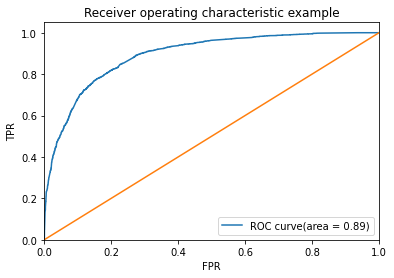

In [151]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_prob)

- ROC curve area is 0.89, which indicates that the model is good.
### <font color = purple> Precision-Recall Trade off</font>
- Precision: Probability that a predicted 'Yes' is actually a 'Yes'. OR out of all leads which are predicted as 1, how many have truly converted. 
  - For instance, if 10 points were predicted to be positive, and of these, only 9 are actually positive, then the precision is 0.9. 
- Recall : Probability that an actual 'Yes' case is predicted correctly. OR out of all leads that have converted, how many of them were correctly identifies as 1. 
  - Continuing from the earlier example, if 18 datapoints were actually positive, then the recall would be 9/18 or 0.5.   
- What do the values of precision and recall mean? How should you interpret them? Suppose a model has a precision of 0.9 and a recall of 0.5. It can be said that the datapoints that are predicted as positive by the model will most likely be positive, but the model will be able to correctly predict only half of the actual positives. 

- Precision-Recall trade-off point is used to decide the cut-off point especially when there is huge imbalance in data.

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
p, r, threshold = precision_recall_curve(y_train_pred_final.converted , y_train_pred_final.converted_prob)

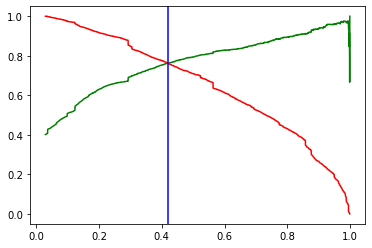

In [154]:
plt.plot(threshold , p[:-1],'g')
plt.plot(threshold , r[:-1],'r')
plt.axvline(x=0.42 ,color='b')
plt.show()

- Based on precision-recall trade off curve, the cutoff points seems to be 0.42

In [155]:
# Plotting the train dataset again with 0.42 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final.converted_prob.map(lambda k : 1if k>0.42 else 0)
y_train_pred_final.head()

,converted,converted_prob,Prospect ID,Predicted,final_predicted,Lead Score,final_predicted_2
0,0,0.523486,1871,1,1,52,1
1,0,0.113305,6795,0,0,11,0
2,0,0.336733,3516,0,0,33,0
3,0,0.818686,8105,1,1,81,1
4,0,0.292254,3934,0,0,29,0


In [156]:
# confusion matrix
confusion_m = metrics.confusion_matrix(y_train_pred_final.converted , y_train_pred_final.final_predicted_2)
confusion_m

array([[3418,  584],
       [ 585, 1881]])

In [157]:
# accuracy score
metrics.accuracy_score(y_train_pred_final.converted , y_train_pred_final.final_predicted_2)

0.8192640692640693

In [158]:
# sensitivity,specificity ,FPR,FNR ,Precision,recall
sen = confusion_m[1,1]/(confusion_m[1,1] + confusion_m[1,0])
spec = confusion_m[0,0]/(confusion_m[0,0] + confusion_m[0,1])
FPR = confusion_m[0,1]/(confusion_m[0,1] + confusion_m[0,0])
FNR = confusion_m[1,0]/(confusion_m[1,0] + confusion_m[1,1])
precision = confusion_m[1,1]/(confusion_m[1,1]+confusion_m[0,1])
recall = confusion_m[1,1]/(confusion_m[1,1]+confusion_m[1,0])

print('Sensitivity : ',sen*100)
print('Specificity : ', spec*100)
print('FPR : ',FPR*100)
print('FNR : ',FNR*100)
print('Precision : ',precision*100)
print('Recall : ',recall*100)

Sensitivity :  76.27737226277372
Specificity :  85.40729635182409
FPR :  14.592703648175911
FNR :  23.722627737226276
Precision :  76.30831643002028
Recall :  76.27737226277372


In [159]:
# classification report
print(metrics.classification_report(y_train_pred_final.converted , y_train_pred_final.final_predicted_2))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4002
           1       0.76      0.76      0.76      2466

    accuracy                           0.82      6468
   macro avg       0.81      0.81      0.81      6468
weighted avg       0.82      0.82      0.82      6468



- By using Precision-Recall tradeoff's cutoff point =0.4 the model output has changed the following way:
   - True positive number has decreased  
   - True negative number has increased 
   - False positive number has decreased 
   - False negative number has increased 
- Basically CEO wants to identify the people correctly who will convert to leads. Thus, we cannot use precision-recall trade-off method as it reduced True Positive(sensitivity). Thus we will use 0.35 as cutoff point.

# <font color = navy>9.Making Predictions on test data set</font>

In [160]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
4269,0,8.0,1011,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2376,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7766,0,5.0,59,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9199,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4359,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### <font color = mediumvioletred> Feature scaling</font>

In [161]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                            'Total Time Spent on Website','Page Views Per Visit']])

In [162]:
rfe_col_5

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Occupation_Unknown', 'Occupation_Working Professional'],
      dtype='object')

In [163]:
X_test_rfe = X_test[rfe_col_5]

# add constant
X_test_sm = sm.add_constant(X_test_rfe)

In [164]:
logm5

In [165]:
# predicting y test
y_test_pred = logm5.predict(X_test_sm)

In [166]:
# create a data frame
y_test_pred_final = pd.DataFrame({'converted':y_test , 'converted_prob':y_test_pred})

y_test_pred_final['Prospect ID'] = y_test.index
y_test_pred_final.head()

,converted,converted_prob,Prospect ID
4269,1,0.510782,4269
2376,1,0.876272,2376
7766,1,0.835646,7766
9199,0,0.097968,9199
4359,1,0.857860,4359


In [167]:
# We will use 0.35 cutoff point
y_test_pred_final['final_predicted'] = y_test_pred_final.converted_prob.map(lambda k : 1 if k>0.35 else 0)
y_test_pred_final.head()

,converted,converted_prob,Prospect ID,final_predicted
4269,1,0.510782,4269,1
2376,1,0.876272,2376,1
7766,1,0.835646,7766,1
9199,0,0.097968,9199,0
4359,1,0.857860,4359,1


In [168]:
# confusion metrics
conf_met = metrics.confusion_matrix(y_test_pred_final.converted , y_test_pred_final.final_predicted)
conf_met

array([[1359,  318],
       [ 209,  886]])

In [169]:
TP = conf_met[1,1] # true positive 
TN = conf_met[0,0] # true negatives
FP = conf_met[0,1] # false positives
FN = conf_met[1,0] # false negatives

In [170]:
# 
sens = TP/(TP+FN)
spec = TN/(TN+FP)
TPR   = TP/(TP+FN)
FPR   = FP/(FP+TN)
FNR   = FN/(FN+TP) 
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print('Sensitivity :',sens*100)
print('Specificity :',spec*100)
print('TPR :',TPR*100)
print('FPR :', FPR*100)
print('FNR :', FNR*100)
print('Precision :',precision*100)
print('Recall :',recall*100)

Sensitivity : 80.91324200913242
Specificity : 81.03756708407872
TPR : 80.91324200913242
FPR : 18.962432915921287
FNR : 19.086757990867582
Precision : 73.58803986710963
Recall : 80.91324200913242


In [171]:
# coeeficients (m and c or beta0 ,beta1) of our model
logm5.params

const                                   -0.791058
Do Not Email                            -1.181079
Total Time Spent on Website              1.065077
Lead Origin_Landing Page Submission     -1.022735
Lead Origin_Lead Add Form                2.802910
Lead Source_Olark Chat                   1.099297
Lead Source_Welingak Website             2.462865
Last Activity_Email Opened               0.728763
Last Activity_Olark Chat Conversation   -0.606781
Last Activity_Other Activity             2.241896
Last Activity_SMS Sent                   1.867202
Last Activity_Unreachable                0.848667
Last Activity_Unsubscribed               1.390614
Specialization_Hospitality Management   -0.995051
Specialization_Others                   -0.978476
Occupation_Unknown                      -1.081804
Occupation_Working Professional          2.396583
dtype: float64

In [172]:
# lets see them in descending order
feature_names = logm5.params.index
sorted_coefficients = sorted(logm5.params, reverse=True)

list(zip(feature_names,sorted_coefficients))


[('const', 2.8029096546287704),
 ('Do Not Email', 2.4628652479489506),
 ('Total Time Spent on Website', 2.3965826435362203),
 ('Lead Origin_Landing Page Submission', 2.241895722050745),
 ('Lead Origin_Lead Add Form', 1.867202243551119),
 ('Lead Source_Olark Chat', 1.3906143515601923),
 ('Lead Source_Welingak Website', 1.0992969389975094),
 ('Last Activity_Email Opened', 1.0650767059925639),
 ('Last Activity_Olark Chat Conversation', 0.8486672730930668),
 ('Last Activity_Other Activity', 0.7287630512770829),
 ('Last Activity_SMS Sent', -0.6067810324572146),
 ('Last Activity_Unreachable', -0.7910582535453199),
 ('Last Activity_Unsubscribed', -0.9784759400430987),
 ('Specialization_Hospitality Management', -0.9950510190143039),
 ('Specialization_Others', -1.0227349897496252),
 ('Occupation_Unknown', -1.081804343402191),
 ('Occupation_Working Professional', -1.1810789308255516)]

- (Do Not Email*2.46) + (Total Time Spent on Website*2.39) + (Lead Origin_Landing Page Submission*2.24) + (Lead Origin_Lead Add Form*1.86) + (Lead Source_Olark Chat*1.39) +(Lead Source_Welingak Website*1.09) + (Last Activity_Email Opened+1.06) + (Last Activity_Olark Chat Conversation *0.84) + (Last Activity_Other Activity*0.72) -(Last Activity_SMS Sent *0.60) - (Last Activity_Unreachable*0.79) - (Last Activity_Unsubscribed*0.97) - (Specialization_Hospitality Management*0.99) - (Specialization_Others*1.02) - (Occupation_Unknown*1.08) - (Occupation_Working Professional*1.18) + 2.8